<a href="https://colab.research.google.com/github/jmamath/UVS-Probabilite-Statistiques/blob/master/Notions_de_base_de_mod%C3%A9lisation_statistiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notions de base de modélisation statistiques

Objectifs pédagogiques:
* Comprendre la modélisation statistiques paramétrique de données aléatoires
* Comprendre l'importance du choix de la loi de probabilité dans un contexte de modélisation
* Se familiariser avec la loi Gaussienne.
* Comprendre les challenges de l'estimation paramétrique

### Question de rappels.
* Rapeller les notions de modèle statistique et d'expérience statistiques.
* Définissez une variable aléatoire avec vos propre mots.

Le TP commence maintenant.
Commençons par importer quelques modules utiles pour la suite.

In [2]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for displaying images
from IPython.core.display import Image
from IPython.core.display import HTML 
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Loi normale
La loi normale, également connue sous le nom de loi Gaussienne, est omniprésente dans la science des données. Vous le rencontrerez à de nombreux endroits, en particulier dans les sujets d'inférence statistique. C'est également l'une des hypothèses de nombreux algorithmes de science des données.

Une distribution normale a une courbe de densité en forme de cloche décrite par sa moyenne $\mu$ et son écart type $\sigma$. La courbe de densité est symétrique, centrée sur sa moyenne, son étalement étant déterminé par son écart type montrant que les données proches de la moyenne sont plus fréquentes que les données éloignées de la moyenne. La fonction de distribution de probabilité d'une courbe de densité normale avec la moyenne $\mu$ et l'écart type $\sigma$ en un point x donné est donnée par:

$$
f(x;\mu, \sigma^{2}) = \frac{e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}}{\sigma\sqrt{2\pi}}
$$



Près de 68% des données se situent à une distance d'un écart-type de la moyenne de chaque côté et 95% à deux écarts-types. Il convient également de mentionner qu'une loi avec une moyenne de 0 et un écart-type 1 est appelée une loi normale standard.

Vous pouvez générer une variable aléatoire normalement distribuée à l'aide de la méthode `norm.rvs()` du module `scipy.stats`. L'argument `loc` correspond à la moyenne de la loi et `scale` correspond à l'écart type et `size` au nombre de tirages effectués. Si vous souhaitez conserver la reproductibilité, incluez un argument `random_state` affecté à un nombre.

Vous pouvez visualiser la loi comme vous l'avez fait avec la distribution uniforme, en utilisant les fonctions de `distplot` de seaborn. La signification des arguments reste la même que dans le dernier cas.

[Text(0, 0.5, 'Fréquence'), Text(0.5, 0, 'Loi normale')]

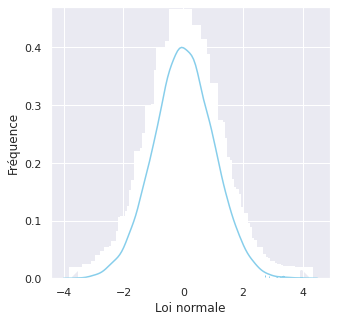

In [5]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 20,'alpha':1})
ax.set(xlabel='Loi normale', ylabel='Fréquence')

# 2. Jeu de données réel
## 2.1 Illustrer une loi à densité
"Les iris de Fisher" sont des données proposées en 1933 par le statisticien Ronald Aylmer Fisher comme données de référence pour l'analyse discriminante et la classification. Les données correspondent à 3 espèces de fleurs (Iris setosa, Iris virginica, Iris versicolor). (voir [Wikipedia](https://fr.wikipedia.org/wiki/Iris_de_Fisher)) 
Les variables mesurées sont la longueur et la largeur des sépales, la longueur et la largeur des pétales. Toutes ces variables sont exprimées en millimètres. Pour se rapeller ce que sont les pétales et les sépales voir [Sépale](https://fr.wikipedia.org/wiki/S%C3%A9pale).

In [3]:
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

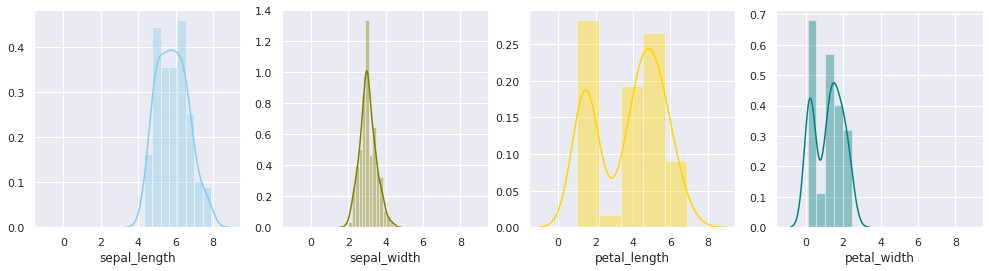

In [13]:
# plot
f, axes = plt.subplots(1, 4, figsize=(17, 4), sharex=True)
sns.distplot( df["sepal_length"] , color="skyblue", ax=axes[0])
sns.distplot( df["sepal_width"] , color="olive", ax=axes[1])
sns.distplot( df["petal_length"] , color="gold", ax=axes[2])
sns.distplot( df["petal_width"] , color="teal", ax=axes[3])


### Questions de modélisation
Dans la suite nous utiliserons systématiquement une loi Gaussienne, on considère la largeur et la longueur des sépales, la largeur et la longueur des sépales comme des variables aléatoires.
1. Donnez une expression du modèle statistique dans chaque cas.
1. Estimez la distribution empirique des largeur et longueur des sépales. Comparez votre loi, à la loi empirique sur un graphique.
1. Estimez la distribution empirique de la longueur et la largeur des pétales. Comparez votre loi, à la loi empirique sur un graphique.
1. À votre avis, dans quel cas est-ce que la loi normale est plus le plus adapté. Justifiez votre réponse.
1. Comment avez-vous procédé pour trouver votre estimation.Pensez-vous qu'il est possible de trouver une meilleure estimation que celle que vous avez trouvé ? 

### Astuce
Pour tracer deux distributions sur le même graphe utilisez le même `axe`, voir ci-dessous.

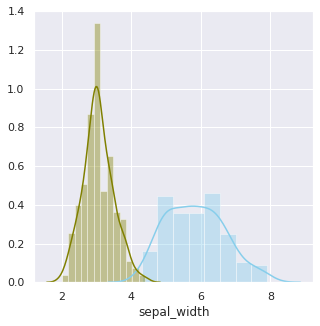

In [18]:
ax = sns.distplot( df["sepal_length"] , color="skyblue")
ax =  sns.distplot( df["sepal_width"] , color="olive")